# **Lab experience #5 (STUDENTS): Hierarchical clustering**

This fifth lab session aims to apply **hierarchical (agglomerative) clustering** algorithm with its variants to cluster an unknown matrix of data (with low dimensionality and continuous attributes). This lab session refers to Prof. Stella's lecture no.6 "Cluster Analysis: hierarchical clustering".

In this lab, you are going to **(re-)use already known packages** (matplotlib, scipy, numpy, seaborn, scikit-learn.preprocessing). Check the previous lab solutions.
Moreover, the **scipy.cluster.hierarchy** package will be introduced to easily cluster data using hierarchical clustering (see documentation [here](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)).

Alternatively, you can use the sklearn.cluster.AgglomerativeClustering package (see documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering))


Notes:
*   to rapidly access the documentation you can also create a new code cell and type in "function_name?" (e.g., matplotlib?) and run the cell.
*   to execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously or click on the "play" icon.


**Read the step-by-step instructions below** carefully and write your own code to fill the missing steps. **Guiding slides** are also available on Moodle to list the steps to perform.

# **Step 1**: Load the input data and import useful packages

In this cell, you load **the input data, a 2D matrix synthetically created**. The matrix has M columns (for the attributes or features) and N rows that we assume to represent the collection of objects (also called observations or items).

**Today, the number of clusters (K) is _not_ given.**

---

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import useful packages for clustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf


# Load the dataset
# ----------------
X_raw = np.load("../datasets/Dataset_lab0506.npy")
[N,M] = np.shape(X_raw)    # N=no. of objects, M=no. of attributes

print("The matrix has shape = ", np.shape(X_raw))
print('It has %d objects and %d attributes.' % (N, M) )

The matrix has shape =  (130, 10)
It has 130 objects and 10 attributes.


/tmp/ipykernel_42877/1039649792.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_raw[:,feat1], y=X_raw[:,feat2], palette='viridis')


<Figure size 1000x500 with 0 Axes>

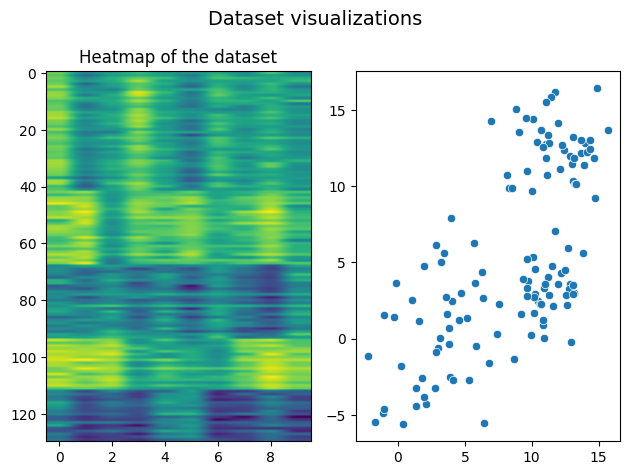

PCA: explained variation per principal component: [0.68 0.12]

Applying tSNE...


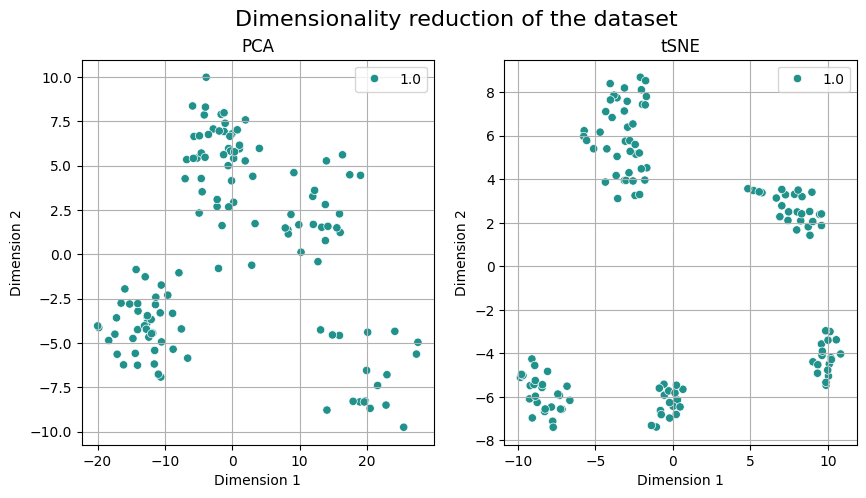

In [8]:
# Visualization in four different ways (image, scatterplot in 2D, PCA, tSNE)
# --------------------------------------------------------------------------
fig1 = plt.figure(figsize=(10,5))
fig1, axs = plt.subplots(1, 2)
fig1.suptitle('Dataset visualizations', fontsize=14)

# PANEL 1: USE imshow()

plt.subplot(1, 2, 1)
plt.imshow(X_raw, aspect='auto', cmap='viridis')
plt.title('Heatmap of the dataset')


# PANEL 2: USE sns.scatterplot SELECTING TWO ATTRIBUTES
feat1 = 0
feat2 = 1

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_raw[:,feat1], y=X_raw[:,feat2], palette='viridis')
plt.tight_layout()
plt.show()

PAL = 'viridis'
# Additional figure with PCA and tSNE decompositions. ***BEFORE RUNNING THE FOLLOWING LINE**** run the method called "PCA_tSNE_visualization(data2visualize, NCOMP, LABELS, PAL)" at the bottom of this page
PCA_tSNE_visualization(X_raw, 2, np.ones(N), PAL)

# **Step 2**: Prepare the dataset

Here, you can decide whether, or not, to scale your data.

In [9]:
# Scaling
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler

# StandardScaler: z = (x - u) / s
# RobustScaler: it removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).
#               The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
# Normalizer:   Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled
#               independently of other samples so that its norm (l1, l2 or inf) equals one.
# MinMaxScaler: Transform features by scaling each feature to a given range.
#               X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#               X_scaled = X_std * (max - min) + min
#               scaler = MinMaxScaler(feature_range=(-1, 1))


# Initialize the scaler you want to use
scaler = StandardScaler()

# Apply the scaling to data
X = scaler.fit_transform(X_raw)

/tmp/ipykernel_42877/3681667102.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X[:,feat1], y=X[:,feat2], palette='viridis')


<Figure size 1000x500 with 0 Axes>

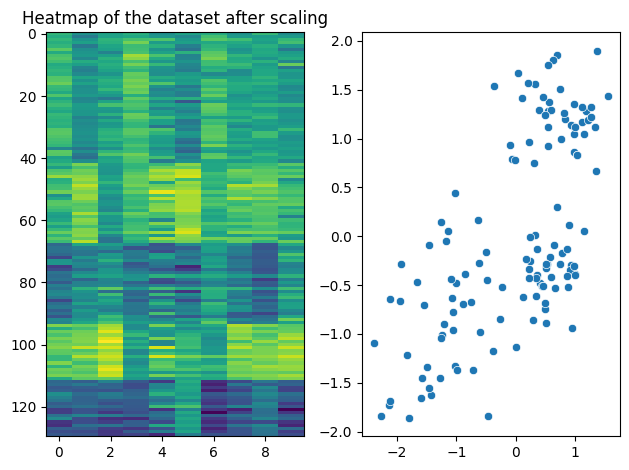

In [26]:
# Visualizations: use what you think it might be useful
fig2 = plt.figure(figsize=(10,5))
fig2, axs = plt.subplots(1, 2)

# PANEL 1: USE imshow()
plt.subplot(1, 2, 1)
plt.imshow(X, aspect='auto', cmap='viridis')
plt.title('Heatmap of the dataset after scaling')

# PANEL 2: USE sns.scatterplot SELECTING TWO ATTRIBUTES

plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:,feat1], y=X[:,feat2], palette='viridis')
plt.tight_layout()
plt.show()


# **Step 3**: Design the clustering algorithm

Choose the parameters:
* choose a **linkage method**: _'ward', 'complete', 'average', 'single',  'median'_
* choose a **metric**: _'euclidean', 'minkowski', 'correlation’, ‘cosine’_
* choose the **number of desired clusters** (OPTIONAL IN HIERARCHICAL CLUSTERING)

_Note. Linkage with ‘ward’ is correctly defined only if Euclidean metric is used._


```
# As an example
method_merging = 'ward'
distance_metric = 'euclidean'
```

In [11]:
# Choose the parameters to run hierarchical clustering (the metric to compute the distance between instances/clusters and the method to merge clusters)
method_merging  = 'ward' # 'single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'
distance_metric = 'euclidean'

# **Step 4**: Apply the clustering algorithm to the dataset

Let us apply the clustering algorithm, just designed (parameters chosen above), to aggregate instances of the dataset into clusters and obtain the linkage matrix, Z

Check the documentation to correctly apply the clustering. Do not impose the number of clusters for now.
For your convenience, here is the basic syntax:

```
Z = hierarchy.linkage(y, method= ..., metric= ..., optimal_ordering='true')
```


In [12]:
# Apply the algorithm to obtain the hierarchy
  # input - instances with their features, metric, method
  # output - condensed distance matrix, Z

Z = hierarchy.linkage(X, method=method_merging, metric=distance_metric, optimal_ordering=True)

Print the linkage matrix


In [13]:
# Print the linkage matrix after clustering
print("Linkage matrix")
print(Z.round(2))

# Column 3 of Z contains all distances among pairs of clusters. Then, print them to have an idea where to cut to obtain N=2 clusters
print("\n Distances:")
print(*Z[:,2].round(2))

Linkage matrix
[[ 35.    29.     0.51   2.  ]
 [ 45.    56.     0.54   2.  ]
 [114.   119.     0.61   2.  ]
 [110.   108.     0.61   2.  ]
 [ 33.    32.     0.64   2.  ]
 [ 26.    15.     0.64   2.  ]
 [ 44.    50.     0.65   2.  ]
 [ 34.    28.     0.68   2.  ]
 [105.   103.     0.68   2.  ]
 [ 19.    17.     0.7    2.  ]
 [ 12.   130.     0.71   3.  ]
 [ 54.    55.     0.74   2.  ]
 [102.   109.     0.79   2.  ]
 [ 24.    18.     0.81   2.  ]
 [ 46.    51.     0.84   2.  ]
 [  6.    21.     0.84   2.  ]
 [131.    61.     0.84   3.  ]
 [ 31.     2.     0.87   2.  ]
 [ 25.    36.     0.88   2.  ]
 [ 57.   136.     0.88   3.  ]
 [ 94.   106.     0.89   2.  ]
 [  1.   140.     0.89   4.  ]
 [137.   148.     0.9    4.  ]
 [ 43.    62.     0.93   2.  ]
 [  5.    20.     0.93   2.  ]
 [ 77.    81.     0.94   2.  ]
 [ 97.   100.     0.96   2.  ]
 [ 11.    41.     0.97   2.  ]
 [ 22.    38.     0.97   2.  ]
 [ 42.    63.     1.02   2.  ]
 [ 14.    16.     1.02   2.  ]
 [  7.     8.     1.02  

In the matrix the **first and second elements** are the two clusters merged at each step, the **third element** is the distance between these clusters, and the **fourth element** is the size of the new cluster - the number of original data points included.
From this matrix, we can derive the dendrogram. See [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html).

3. Visualize this clustering solution using the dendrogram. Hint: check documentation for ```hierarchy.dendrogram```

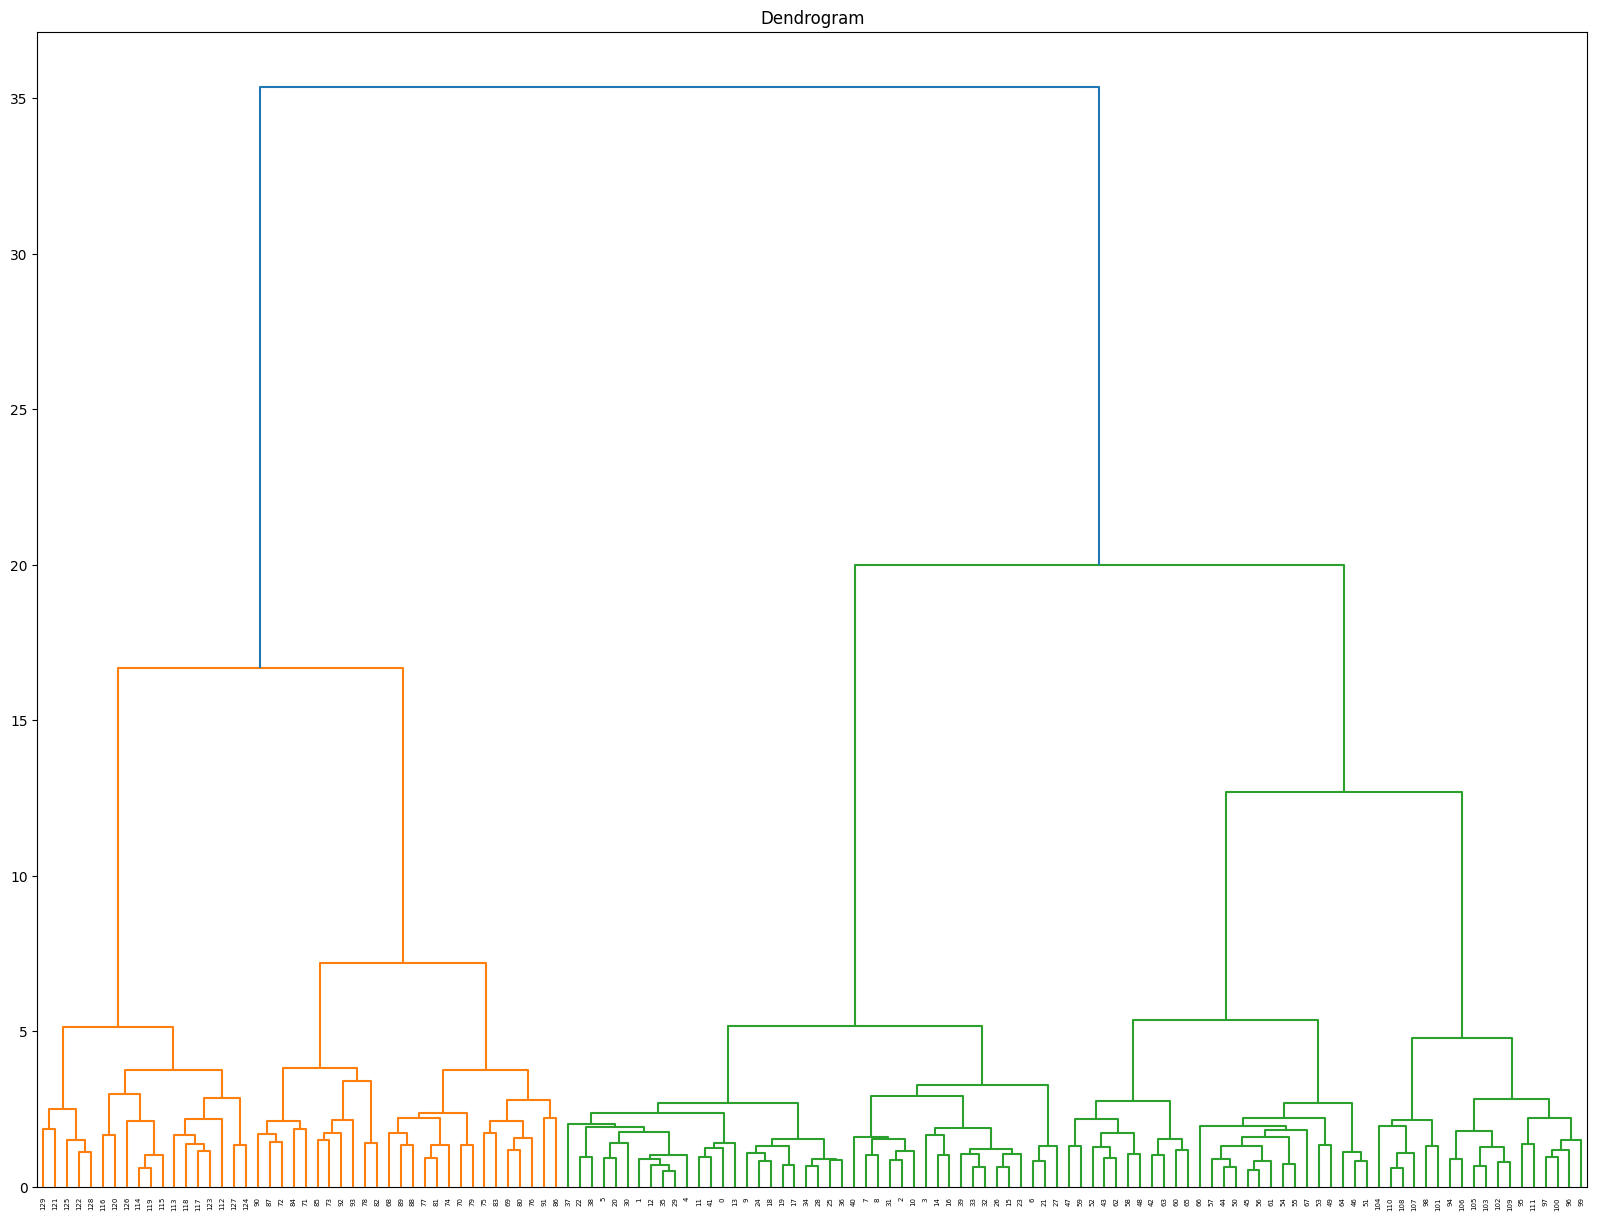

In [14]:
# Visualize the DENDROGRAM of the corresponding clustering
fig4 = plt.figure(figsize=(20, 15))
# plot the dendrogram here
plt.title('Dendrogram')
hierarchy.dendrogram(Z)


plt.show()
#
#

# **Step 5**: Use the clustering solution to form clusters

1. You can decide where to cut the forest (max_d) created by the hierarchical algorithm


In [15]:
# Cut the forest at max_d (to be chosen by inspection of the dendrogram)
max_d = 10

2. Obtain the corresponding K clusters. Hint: check documentation for ```fcluster```.

In [16]:
from scipy.cluster.hierarchy import fcluster

# Form the clusters
labels = fcluster(Z, max_d, criterion='distance')
print(labels.shape)
print(labels)


# Confirm that you cut correctly, to have N clusters
K = labels.max()
print("We got %d cluster(s)." % K)

(130,)
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
We got 5 cluster(s).


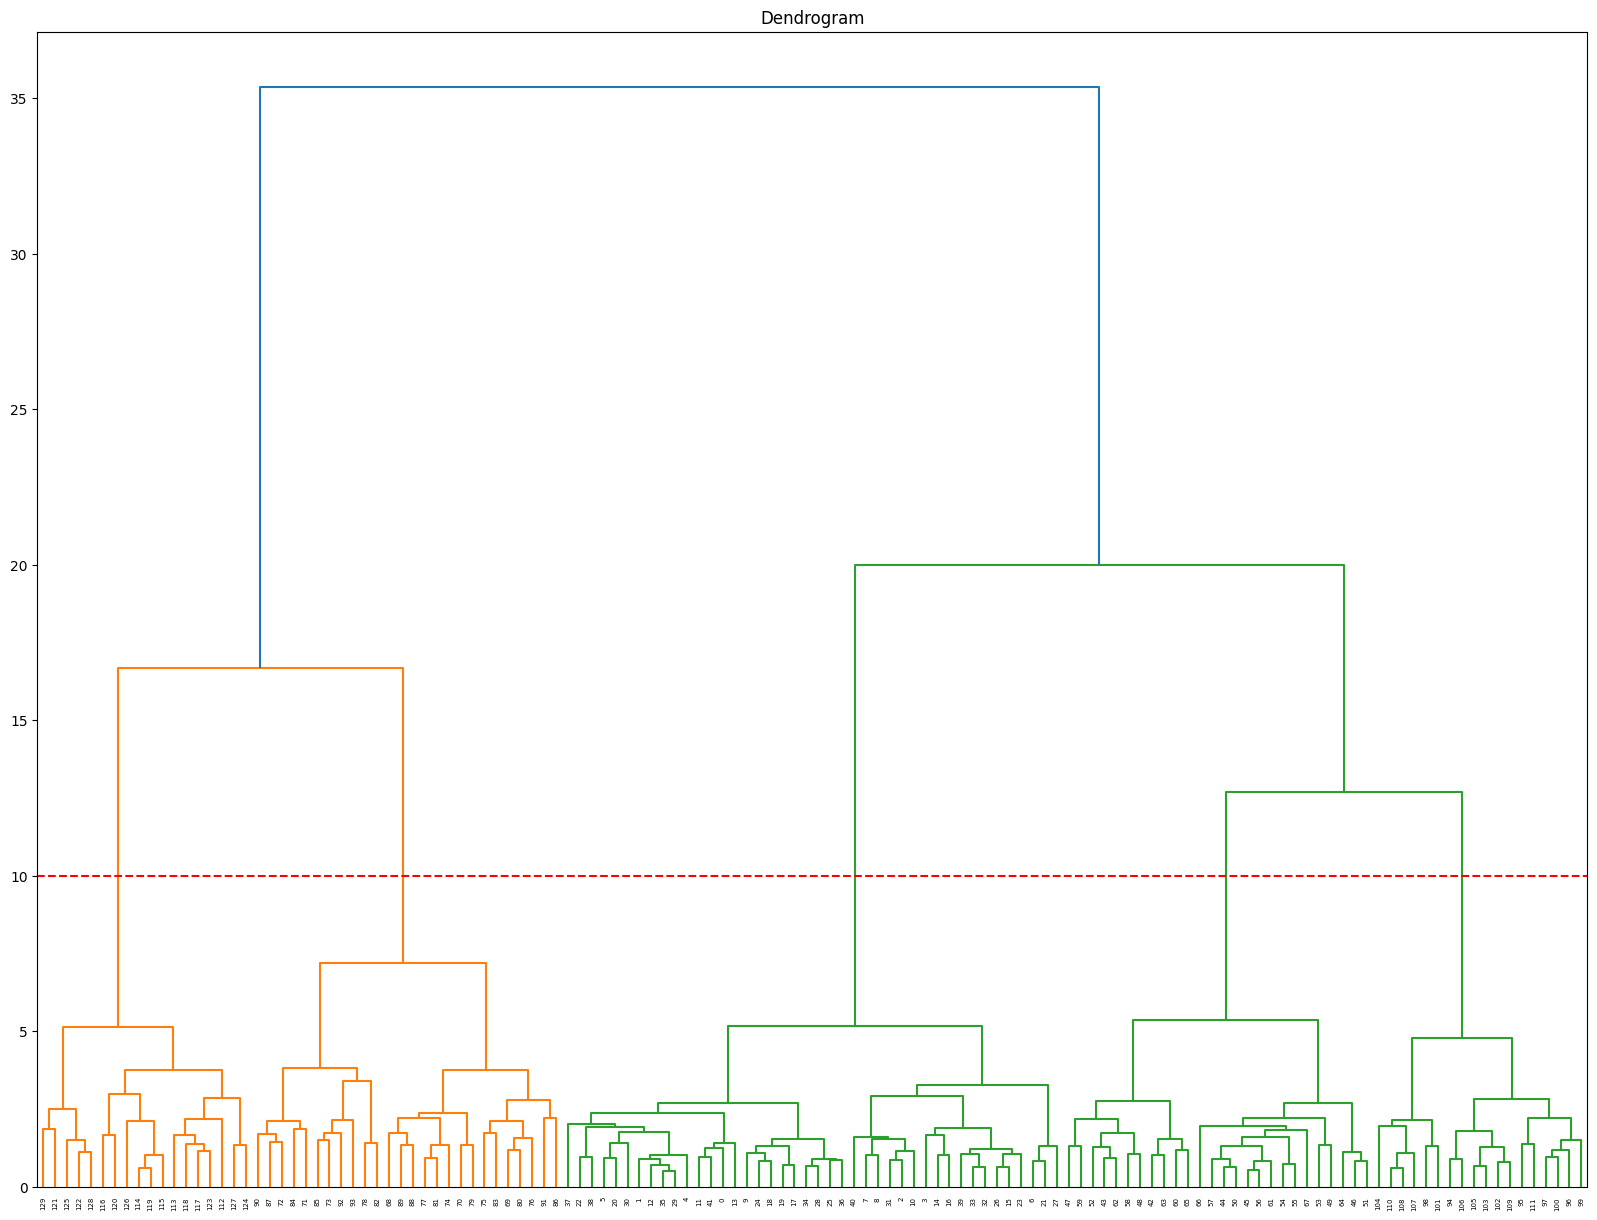

In [17]:
# Add a horizontal line to the dendrogram indicating the cut
plt.figure(fig4)
# plot the line here
plt.axhline(y=max_d, color='r', linestyle='--')
plt.show()

# **Step 6**: Compute and visualize the cluster centers

Hint: to compute the cluster centers, you can re-use the code already developed for Lab03.

Attention: ```labels``` are automatically assigned by the clustering algorithm in a numerical format starting **from 1**. Then, be careful what you input in the method developed for Lab03 (you need to slightly modify the input labels).

In [18]:
# Compute the new centroids
#
def find_cluster_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(0, K):
        centers[k] = np.mean(X[labels == k+1], axis=0)
    return centers

centers  = find_cluster_centers(X, labels, K)
centers

array([[-1.42737416, -1.42164402, -1.56828016, -1.64913111, -0.96530394,
        -0.00515538, -2.17309219, -1.58790277, -0.94712339, -1.81078364],
       [-1.10907117, -0.47179139, -0.15935313, -0.89477572, -0.72935202,
        -0.98958047, -0.02804283, -0.78049972, -1.3894145 , -0.0577787 ],
       [ 0.54223386, -0.3908761 ,  0.12523237,  0.84315339, -0.01625685,
        -0.51356232,  0.6474342 ,  0.07706626,  0.1544376 , -0.12926184],
       [ 0.56394943,  1.2853333 , -0.20722719,  0.74110849,  1.0348115 ,
         1.53828718,  0.45585004,  0.86814421,  0.95233516,  0.54365166],
       [ 0.9495599 ,  1.15857216,  1.80557621, -0.09626303,  0.56201734,
         0.4108911 ,  0.04446865,  1.2814839 ,  1.21810582,  1.4105781 ]])

/tmp/ipykernel_42877/2020605235.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X[:,feat1], y=X[:,feat2], palette='viridis')


<Figure size 1000x500 with 0 Axes>

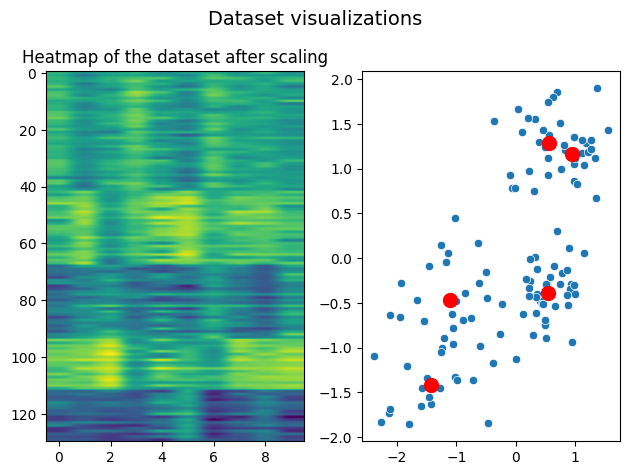

In [30]:
# Visualizations: use what you think it might be useful
# -----------------------------------------------------
fig5 = plt.figure('TITLE', figsize=(10,5))
fig5, axs = plt.subplots(1, 2)
fig5.suptitle('Dataset visualizations', fontsize=14)

# PANEL 1: USE imshow()
plt.subplot(1, 2, 1)
plt.imshow(X, aspect='auto', cmap='viridis')
plt.title('Heatmap of the dataset after scaling')

# PANEL 2: USE sns.scatterplot SELECTING TWO ATTRIBUTES
plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:,feat1], y=X[:,feat2], palette='viridis')
plt.scatter(centers[:,feat1], centers[:,feat2], c='r', s=100)
#plt.plot(X[:,feat1], X[:,feat2])
plt.tight_layout()
plt.show()

#
#
#
#

PCA: explained variation per principal component: [0.65 0.13]

Applying tSNE...


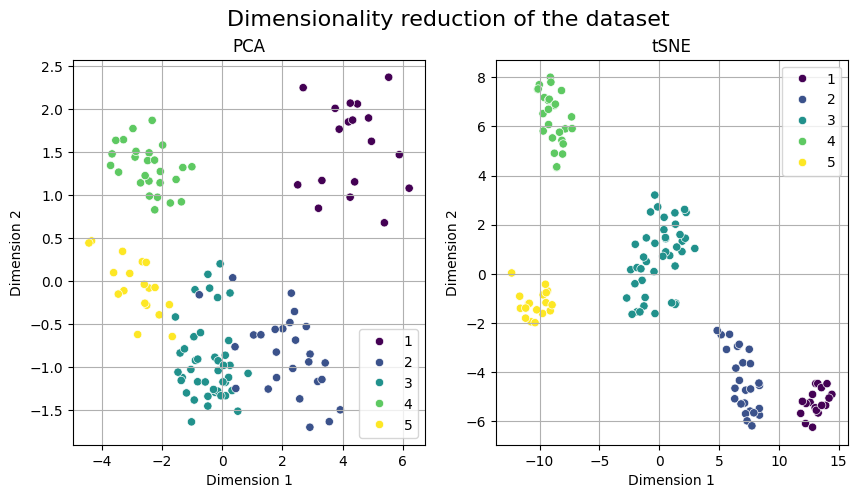

In [20]:
PCA_tSNE_visualization(X, 2, labels, PAL)

# **Step 7**: Validation

1. compute the _inter-cluster distances_ and the _intra-cluster distances_. Hint: see Lab04.



In [21]:
# Compute the intra- and inter-clusters distances
#
#
#

intra_inter_cluster_distances(X, K, labels, centers, 'euclidean')

The intra-cluster distance of the clusters are:  [ nan 2.22 2.42 1.59 1.76]

All pair-wise inter-cluster distances:
 [[0.   3.62 5.47 6.88 7.54]
 [3.62 0.   3.19 5.18 5.31]
 [5.47 3.19 0.   3.16 3.57]
 [6.88 5.18 3.16 0.   2.75]
 [7.54 5.31 3.57 2.75 0.  ]]


/tmp/ipykernel_42877/3714997832.py:34: RuntimeWarning: invalid value encountered in scalar divide
  d[k] = d[k]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs


(array([       nan, 2.22254902, 2.41944615, 1.59324042, 1.75796923]),
 array([[0.  , 3.62, 5.47, 6.88, 7.54],
        [3.62, 0.  , 3.19, 5.18, 5.31],
        [5.47, 3.19, 0.  , 3.16, 3.57],
        [6.88, 5.18, 3.16, 0.  , 2.75],
        [7.54, 5.31, 3.57, 2.75, 0.  ]]))

In [22]:
# Import the "silhouette_score" package you need
from sklearn.metrics import silhouette_score

# Compute the silhouette score, S
S = silhouette_score(X, labels, metric='euclidean')

# Print the score
print( 'For %d clusters,' % K, 'the silhouette score is = %.3f.' % S)

For 5 clusters, the silhouette score is = 0.440.


# _This it the end of Lab session #5_ ✅


In [23]:
# [FROM SOLUTION OF LAB#4] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO find visualize data in 2D with clusters in different colours

def PCA_tSNE_visualization(data2visualize, NCOMP, LABELS, PAL):

  '''
  INPUT
  data2visualize    - data matrix to visualize
  NCOMP             - no. of components to decompose the dataset during PCA
  LABELS            - labels given by the clustering solution
  PAL               - palette of colours to distinguish between clusters
  '''

  '''
  OUTPUT
  Two figures: one using PCA and one using tSNE
  '''


  # PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components=NCOMP)
  pca_result = pca.fit_transform(data2visualize)
  print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

  # tSNE
  from sklearn.manifold import TSNE
  print('\nApplying tSNE...')
  np.random.seed(100)
  tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300)
  tsne_results = tsne.fit_transform(data2visualize)


  # Plots
  fig1000 = plt.figure(figsize=(10,5))
  fig1000.suptitle('Dimensionality reduction of the dataset', fontsize=16)


  # Plot 1: 2D image of the entire dataset
  ax1 = fig1000.add_subplot(121)
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
  ax1.set_xlabel('Dimension 1', fontsize=10)
  ax1.set_ylabel('Dimension 2', fontsize=10)
  ax1.title.set_text('PCA')
  plt.grid()

  ax2= fig1000.add_subplot(122)
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)
  ax2.set_xlabel('Dimension 1', fontsize=10)
  ax2.set_ylabel('Dimension 2', fontsize=10)
  ax2.title.set_text('tSNE')
  plt.grid()
  plt.show()

In [24]:
# [FROM SOLUTION OF LAB#3] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO compute the intra- and inter-cluster distances

def intra_inter_cluster_distances(data, K, labels, cluster_centers, distance_metric):

  '''
  INPUT
  data            - data matrix for which to compute the proximity matrix
  K               - the expected number of clusters
  labels          - predicted labels from the clustering solution applied to data
  cluster_centers - cluster centres from the clustering solution applied to data
  distance_metric - metric to compute the distances within and between clusters. Here, you use the same metric for both measurements (but it might be possible to use two different metrics)
  '''

  '''
  OUTPUT
  d               - intra-cluster distance
  D               - inter-cluster distances
  '''

  from scipy.spatial.distance import pdist as pdist
  from scipy.spatial.distance import squareform as sf


  # Intra-cluster distances (average over all pairwise distances) ----------------- NOTE: bug fixed here!
  PM = pdist(data, metric=distance_metric)
  PM = sf(PM).round(2)

  d = np.zeros(K)
  for k in range(K):
    ind = np.array( np.where(labels == k ) )
    for r in range(ind.size):
      d[k] = d[k] + np.sum( PM[ [ind[0][r]], [ind] ] )
    d[k] = d[k]/2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
    d[k] = d[k]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs
  print("The intra-cluster distance of the clusters are: ", d.round(2))


  # Inter-cluster distance ---------------------------------------------------
  D = pdist(cluster_centers, metric=distance_metric)
  D = sf(D).round(2)
  print("\nAll pair-wise inter-cluster distances:\n", D)

  return d, D

In [25]:
# [FROM SOLUTION OF LAB#2] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO find cluster centers

def find_cluster_centers(data, K, labels):

  '''
  INPUT
  data    - data matrix for which to compute the proximity matrix
  K       - the expected number of clusters
  labels  - predicted labels from the clustering solution applied to data
  '''

  '''
  OUTPUT
  cluster_centers   - cluster centres from the clustering solution applied to data
  '''

  # Initialize the output
  cluster_centers = np.zeros((K, np.shape(data)[1]))   # np.shape(data)[1] = no. of attributes

  print("%d centroids are being computed, as we have %d clusters." % (K, K) )

  for k in range(0, K):
    ind = np.array( np.where( labels == k ) )
    cluster_points = data[ind, :][0]
    cluster_centers[k,:] = np.mean(cluster_points, axis=0) # cluster_points.mean(axis=0)
    print("The centroid of cluster %d has coordinates: " % (k), *cluster_centers[k,:].round(2))

  return cluster_centers